### DClick Report
This notebook takes a excel download from DClick and transforms and formats the excel data into another formatted pivot report in html format for embedding into email.
The notebook is parameterized and can be run with different parameters, generating different output "emails".

Generate and save output to HTML file
And specify the path and name of this HTML file in the excel script file in the HTMLBody field in place of normal HTML body to use in email message.

Prior to "saving" the HTML file - further formatting can be done using Jinja templates to customize the HTML document.


In [2]:
# parameters
#file = r'C:\Users\roh\Downloads\1602bbe3-3ba6-4d5f-8f80-79cfe019dbc5.xlsx'
#file = r'C:\Users\roh\Downloads\countrystoreproduct.xlsx'

# excel download from DClick
file = 'C:/Users/roh/Downloads/d5c7a4f7-b9a7-4d1e-904e-ce7349e0f27c.xlsx'

# country parameter
country = ['ALL'] # 'Korea'

category_field1 = 2 #0
category_field2 = 4 #1

In [5]:
import pandas as pd
import numpy as np

# sample of excel download from DClick
df1 = pd.read_excel(open(file, 'rb'), sheet_name='Sheet1')
df1

,Country,Store,Retail product L1,Retail product L2,Day Net Sales (kEUR) TY,Day Net Sales (kEUR) LY,Day Net Sales Variation,WTD Net Sales (kEUR) TY,WTD Net Sales (kEUR) LY,WTD Net Sales Variation,MTD Net Sales (kEUR) TY,MTD Net Sales (kEUR) LY,MTD Net Sales Variation,YTD Net Sales (kEUR) TY,YTD Net Sales (kEUR) LY,YTD Net Sales Variation
0,Thailand,Bangkok Siam Paragon,Women Universe,W Bags,176.524848,124.058032,0.422922,812.291502,724.713933,0.120844,552.733193,463.831670,0.191668,43496.831739,16810.092305,1.587543
1,Korea,Seoul Shinsegae Kangnam Women,Women Universe,W Bags,212.693576,141.442067,0.50375,785.393278,432.933636,0.814119,607.376931,255.342836,1.378672,31605.343943,23717.482337,0.332576
2,Korea,Seoul Lotte Main Women,Women Universe,W Bags,89.944064,91.147781,-0.013206,391.301011,423.720902,-0.076512,295.872954,295.449213,0.001434,25449.879414,19365.750406,0.31417
3,Korea,Seoul Lotte Jamsil Women,Women Universe,W Bags,105.575090,112.100904,-0.058214,512.145911,511.399781,0.001459,331.502500,313.651603,0.056913,25414.072751,19244.011453,0.320622
4,Macau,Macau Venetian Women,Women Universe,W Bags,49.442706,234.154194,-0.788846,492.301146,1119.722626,-0.560337,331.339018,685.005648,-0.516297,23544.011766,40579.065161,-0.419799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,Hong Kong,Hong Kong Times Square Women,PCD,PCD,0.000000,0.000000,-,0.000000,0.000000,-,0.000000,0.000000,-,0.000000,0.174858,-1
1139,Australia,Sydney George Street Temp,Women Universe,W Bags,0.000000,72.296187,-1,0.000000,261.770897,-1,0.000000,139.465394,-1,-0.000006,6579.601211,-1.0
1140,Australia,Australia Pop-Up 2,Women Universe,W Accessories,0.000000,0.000000,-,0.000000,0.000000,-,0.000000,0.000000,-,-0.528755,0.000000,-
1141,Hong Kong,Hong Kong Times Square Women,Men Universe,M Accessories,0.000000,0.000000,-,0.000000,0.000000,-,0.000000,0.000000,-,-0.697551,0.000000,-


In [6]:
# tablulating subtotals dynamically in pandas table
# https://towardsdatascience.com/tabulating-subtotals-dynamically-in-python-pandas-pivot-tables-6efadbb79be2

def pivot_table_w_subtotals(df, values, indices, columns, aggfunc, fill_value):
    '''
    Adds tabulated subtotals to pandas pivot tables with multiple hierarchical indices.
    
    Args:
    - df - dataframe used in pivot table
    - values - values used to aggregrate
    - indices - ordered list of indices to aggregrate by
    - columns - columns to aggregrate by
    - aggfunc - function used to aggregrate (np.max, np.mean, np.sum, etc)
    - fill_value - value used to in place of empty cells
    
    Returns:
    -flat table with data aggregrated and tabulated
    
    '''
    listOfTable = []
    for indexNumber in range(len(indices)):
        n = indexNumber+1
        table = pd.pivot_table(df,values=values,index=indices[:n],columns=columns,aggfunc=aggfunc,fill_value=fill_value).reset_index()
        for column in indices[n:]:
            table[column] = ''
        listOfTable.append(table)
    concatTable = pd.concat(listOfTable).sort_index()
    concatTable = concatTable.set_index(keys=indices)
    return concatTable.sort_index(axis=0,ascending=True)



In [7]:
# apply pivot table to excel data

df = pd.read_excel(open(file, 'rb'), sheet_name='Sheet1')
if country[0].lower() == 'all':
    new_table = df
#else:
#    new_table = df[df['Country'].isin(country)]
values = list(df.columns)[4:]  # define list of key facts - from column 5 onwards
indices = list(df.columns)[category_field1:category_field2] # define list of categorisation columns
#columns = list(df.columns)[2:3]
df = pivot_table_w_subtotals(df=new_table, indices=indices, columns=[], values=values, \
          aggfunc='sum',fill_value='')#.sort_values([('Day Net Sales (kEUR) TY')], ascending=False)
#df.sort_values(['Country','YTD Net Sales (kEUR) TY'], ascending=[1,0], inplace=True)
#df.sort_values(['YTD Net Sales (kEUR) TY'], ascending=[0], inplace=True)

#df['equal_or_lower_than_4?'] = df['set_of_numbers'].apply(lambda x: 'True' if x <= 4 else 'False')
#df['Day chg']=df['Day Net Sales (kEUR) LY'].apply(lambda x: df['Day Net Sales (kEUR) TY']/df['Day Net Sales (kEUR) LY']-1
#                                                 if x!=0 else 0)

df['Day chg']=df['Day Net Sales (kEUR) TY']/df['Day Net Sales (kEUR) LY']-1
df['WTD chg']=df['WTD Net Sales (kEUR) TY']/df['WTD Net Sales (kEUR) LY']-1
df['MTD chg']=df['MTD Net Sales (kEUR) TY']/df['MTD Net Sales (kEUR) LY']-1
df['YTD chg']=df['YTD Net Sales (kEUR) TY']/df['YTD Net Sales (kEUR) LY']-1
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df[['Day Net Sales (kEUR) TY','Day Net Sales (kEUR) LY','Day chg',
    'WTD Net Sales (kEUR) TY','WTD Net Sales (kEUR) LY','WTD chg',
    'MTD Net Sales (kEUR) TY','MTD Net Sales (kEUR) LY','MTD chg',
    'YTD Net Sales (kEUR) TY','YTD Net Sales (kEUR) LY','YTD chg']]

#df.crosstab()
#df.sort_values(['Retail product L1','YTD Net Sales (kEUR) TY'], ascending=[1,0], inplace=True)
# https://towardsdatascience.com/how-to-do-a-custom-sort-on-pandas-dataframe-ac18e7ea5320
df.sort_values(['Retail product L1','YTD Net Sales (kEUR) TY'], ascending=[0,0], inplace=True)
df

Day Net Sales (kEUR) TY  \
Retail product L1   Retail product L2                            
Women Universe                                     5814.012995   
                    W Bags                         3099.409852   
                    W RTW                           714.140193   
                    W SLG                           612.401644   
                    W Accessories                   747.313120   
                    W Shoes                         640.748187   
                    Haute Couture                     0.000000   
                    W Special                         0.000000   
PCD                                                   0.317644   
                    PCD                               0.317644   
Men Universe                                       1470.198824   
                    M RTW                           685.813411   
                    M Shoes                         253.383398   
                    M Bags                          281.610435   
                    M SLG                           183.459150   
                    M Accessories                    65.932429   
                    M Special                         0.000000   
Jewellery & Watches                                 129.710784   
                    Jewellery                       125.441807   
                    Watches                           4.268977   
Dior Maison                                          22.831765   
                    Maison                           22.831765   
                    Maison Special                    0.000000   
Baby                                                 55.363882   
                    Baby                             55.363882   

                                       Day Net Sales (kEUR) LY   Day chg  \
Retail product L1   Retail product L2                                      
Women Universe                                     5343.377625  0.088078   
                    W Bags                         3019.529347  0.026455   
                    W RTW                           783.389087 -0.088397   
                    W SLG                           498.950279  0.227380   
                    W Accessories                   600.385455  0.244722   
                    W Shoes                         441.123456  0.452537   
                    Haute Couture                     0.000000       NaN   
                    W Special                         0.000000       NaN   
PCD                                                   0.651683 -0.512579   
                    PCD                               0.651683 -0.512579   
Men Universe                                       1170.102960  0.256470   
                    M RTW                           613.646372  0.117604   
                    M Shoes                         179.644796  0.410469   
                    M Bags                          210.411735  0.338378   
                    M SLG                           120.895436  0.517503   
                    M Accessories                    43.631342  0.511125   
                    M Special                         1.873279 -1.000000   
Jewellery & Watches                                 112.563548  0.152334   
                    Jewellery                       109.371339  0.146935   
                    Watches                           3.192210  0.337311   
Dior Maison                                          15.147084  0.507337   
                    Maison                           15.147084  0.507337   
                    Maison Special                    0.000000       NaN   
Baby                                                 98.816436 -0.439730   
                    Baby                             98.816436 -0.439730   

                                       WTD Net Sales (kEUR) TY  \
Retail product L1   Retail product L2                            
Women Universe                                    33941.534227   
     

In [8]:
# apply style sheet / formatting to table

import jinja2  # pip install Jinja2
def color_negative_red(value):
    """
    Colors elements in a dateframe
    green if positive and red if
    negative. Does not color NaN
    values.
    """

    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'
    else:
        color = 'black'

    #return 'color: %s' % color
    return f"color:{color};background-color:lightyellow"

def bold(val, props=''):
    return "font-weight:bold;color:black;background-color:darkgrey;text-align:top"

def highlight_max1(s, props=''):
    return np.where(s != 0.0001, props, '')

def highlight_max(s, props=''):
    return [(props if 'Thailand' in s else None) for s in s.index]

def color_red(val):
    return "color: red"

def color_third_red(value):
    return [('color: red' if 'Third' in x else 'color: black') for x in val.index]

def highlight_x(s):
    return ["vertical-align:text-top;" if "" in v else "" for v in s]
#df.style.apply_index(highlight_x, axis="columns", level=[0, 1])



df_style = (df.style
    .set_caption('Daily Sales Report - ' + ', '.join(country))
    .set_table_styles([
    {'selector': 'caption', 'props': [('font-weight', 'bold'),('color', 'darkblue'),('font-size', '16px')]},
    {'selector': 'th', 'props': [('border-style','solid'),('border-color','lightgrey'),('border-width','0.1px')]}
    ])            
    .applymap(color_negative_red, subset=[col for col in df.columns if 'chg' in col])
    .apply_index(highlight_x, axis="index", level=[0])
    .format(precision=0, na_rep='na', thousands=",", 
            formatter={'Day chg': "{:.0%}",
                       'MTD chg': "{:.0%}",
                       'YTD chg': "{:.0%}"
                      })    
)


display(df_style)
#.applymap(bold, subset=slice_)

In [9]:
# export entire table with style formatting as HTML code for embedding in an email template
#print(df_style.to_html())
style_output = df_style.to_html()
print(style_output)

<style type="text/css">
#T_cf539 caption {
  font-weight: bold;
  color: darkblue;
  font-size: 16px;
}
#T_cf539 th {
  border-style: solid;
  border-color: lightgrey;
  border-width: 0.1px;
}
#T_cf539_row0_col2, #T_cf539_row0_col5, #T_cf539_row0_col8, #T_cf539_row0_col11, #T_cf539_row1_col2, #T_cf539_row1_col8, #T_cf539_row1_col11, #T_cf539_row2_col5, #T_cf539_row2_col8, #T_cf539_row2_col11, #T_cf539_row3_col2, #T_cf539_row3_col5, #T_cf539_row3_col8, #T_cf539_row3_col11, #T_cf539_row4_col2, #T_cf539_row4_col11, #T_cf539_row5_col2, #T_cf539_row5_col5, #T_cf539_row5_col8, #T_cf539_row5_col11, #T_cf539_row6_col11, #T_cf539_row8_col11, #T_cf539_row9_col11, #T_cf539_row10_col2, #T_cf539_row10_col5, #T_cf539_row10_col8, #T_cf539_row10_col11, #T_cf539_row11_col2, #T_cf539_row11_col5, #T_cf539_row11_col8, #T_cf539_row11_col11, #T_cf539_row12_col2, #T_cf539_row12_col5, #T_cf539_row12_col8, #T_cf539_row12_col11, #T_cf539_row13_col2, #T_cf539_row13_col5, #T_cf539_row13_col8, #T_cf539_row13_col11

In [44]:
from pathlib import Path, PureWindowsPath
current_DIR = Path('.').resolve().absolute().__str__()
print(current_DIR)

C:\Users\roh\Documents\python\Opt_test\NewTest\Optimus\scripts\sample_notebook


In [12]:
#https://www.tutorialspoint.com/write-a-python-program-to-export-a-dataframe-to-an-html-file
f = open('pandas.html','w')
f.write(style_output)
f.close()

In [7]:
import scrapbook as sb

In [8]:
x = 1

In [9]:
sb.glue("x", x)

In [10]:
nb = sb.read_notebook("DClickReport.ipynb")

In [11]:
nb.scraps

Scraps([('x', Scrap(name='x', data=1, encoder='json', display=None))])

In [12]:
nb.scrap_dataframe

,name,data,encoder,display,filename
0,x,1,json,None,DClickReport.ipynb


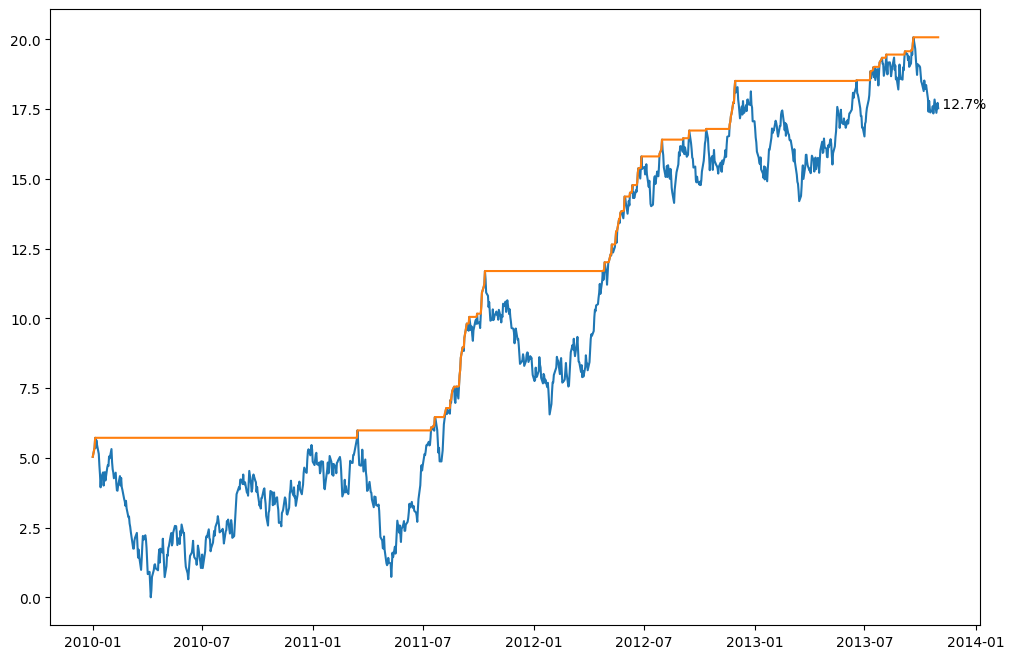

In [14]:
length = 1000
symbol = "XYZ"
d = {
    "a": 1,
    "b": 2,
}
threshold = 0.1 # 10%
import pandas as pd
import numpy as np
import scrapbook as sb
import matplotlib.pyplot as plt
# generate a DataFrame that has synthetic price information
idx = pd.date_range(start='20100101', periods=length, freq='B')
prices = pd.DataFrame({'price' : np.cumsum(np.random.random(length) - .5)}, index=idx)
# normalize to always be above 0
prices['price'] += abs(prices['price'].min())
prices['ATH'] = prices['price'].expanding().max()
distance = 1 - prices.iloc[-1]['price']/prices.iloc[-1]['ATH']
if distance <= threshold:
    close_to_ath = True
else:
    close_to_ath = False
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(prices['price'])
ax.plot(prices['ATH'])
ax.text(prices.index[-1], prices['price'].iloc[-1], f"{distance * 100: .1f}%");

In [15]:
sb.glue("length", length)                           # numeric - int (stored as json)
sb.glue("symbol", symbol)                           # text
sb.glue("distance", distance)                       # numeric - float
sb.glue("close_to_ath", close_to_ath)               # bool

{'a': 1, 'b': 2}

Scrap of type <class 'matplotlib.figure.Figure'> has no supported encoder registered


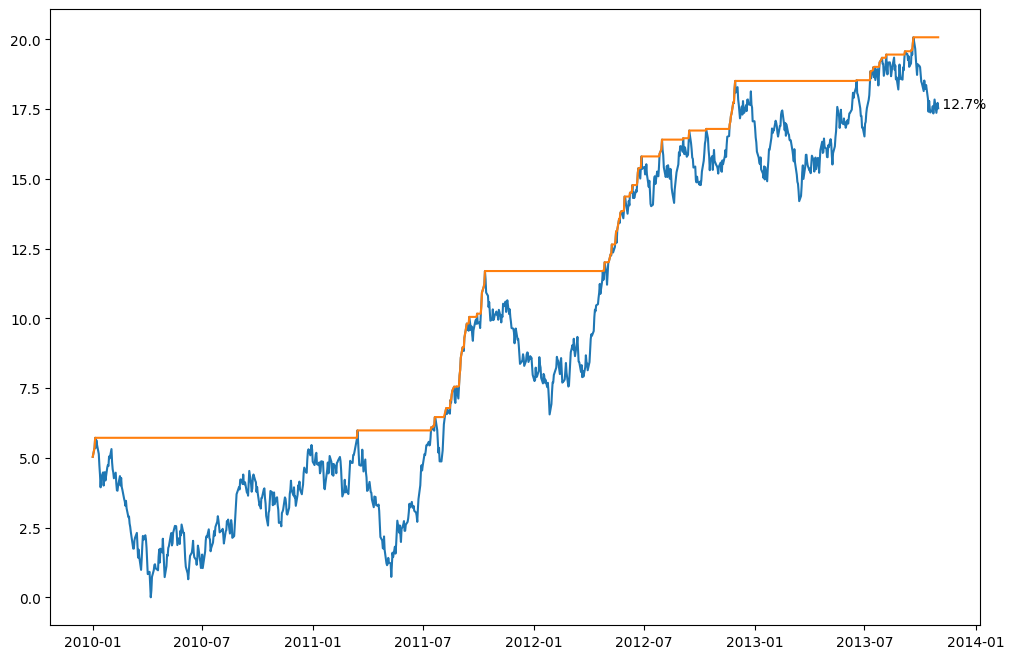

In [16]:
# with display set, this will display the value, see it in the output below?
sb.glue("dj", d, encoder="json", display=True)  
sb.glue("prices", prices, encoder="pandas")
sb.glue("message", "This is a message", encoder="text")
try:
    sb.glue("chart", fig)
except NotImplementedError as nie:
    print(nie)
# but we can store the display result (will also display the value)
sb.glue("chart", fig, encoder="display")

In [19]:
nb = sb.read_notebook("DClickReport.ipynb")
nb.scrap_dataframe

,name,data,encoder,display,filename
0,x,1,json,None,DClickReport.ipynb
1,length,1000,json,None,DClickReport.ipynb
2,symbol,XYZ,text,None,DClickReport.ipynb
3,distance,0.126757,json,None,DClickReport.ipynb
4,close_to_ath,False,json,None,DClickReport.ipynb
5,dj,None,display,"{'data': {'text/plain': '{'a': 1, 'b': 2}'}, '...",DClickReport.ipynb
6,prices,price ATH 2010-01-01 ...,pandas,None,DClickReport.ipynb
7,message,This is a message,text,None,DClickReport.ipynb
8,chart,None,display,{'data': {'image/png': 'iVBORw0KGgoAAAANSUhEUg...,DClickReport.ipynb


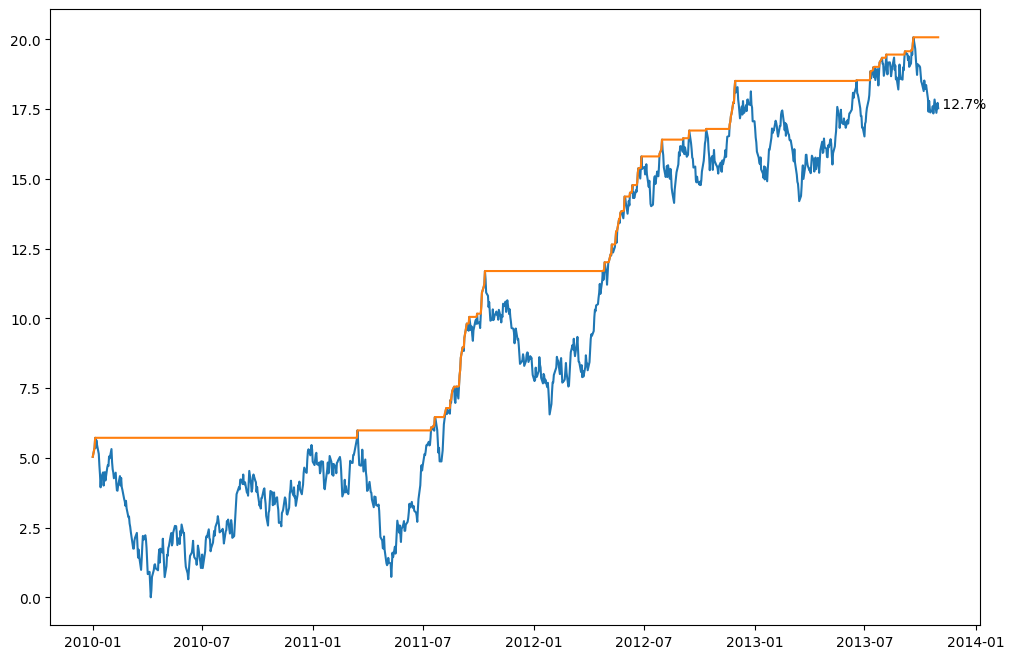

In [20]:
sb.glue("chart", fig, encoder="display")

In [31]:
df = nb.scrap_dataframe
obj = df[(df.name == "prices") & (df.filename == "DClickReport.ipynb")]['data']
obj

6                    price        ATH
2010-01-01   ...
Name: data, dtype: object

In [36]:
df[df.name=='prices']['data']

6                    price        ATH
2010-01-01   ...
Name: data, dtype: object

In [41]:
nb.scraps

Scraps([('x', Scrap(name='x', data=1, encoder='json', display=None)),
        ('length',
         Scrap(name='length', data=1000, encoder='json', display=None)),
        ('symbol',
         Scrap(name='symbol', data='XYZ', encoder='text', display=None)),
        ('distance',
         Scrap(name='distance', data=0.1267568810984402, encoder='json', display=None)),
        ('close_to_ath',
         Scrap(name='close_to_ath', data=False, encoder='json', display=None)),
        ('dj',
         Scrap(name='dj', data=None, encoder='display', display={'data': {'text/plain': "{'a': 1, 'b': 2}"}, 'metadata': {'scrapbook': {'data': False, 'display': True, 'name': 'dj'}}, 'output_type': 'display_data'})),
        ('prices',
         Scrap(name='prices', data=                price        ATH
         2010-01-01   5.034083   5.034083
         2010-01-04   5.359253   5.359253
         2010-01-05   5.716434   5.716434
         2010-01-06   5.359828   5.716434
         2010-01-07   5.629419   5.716434


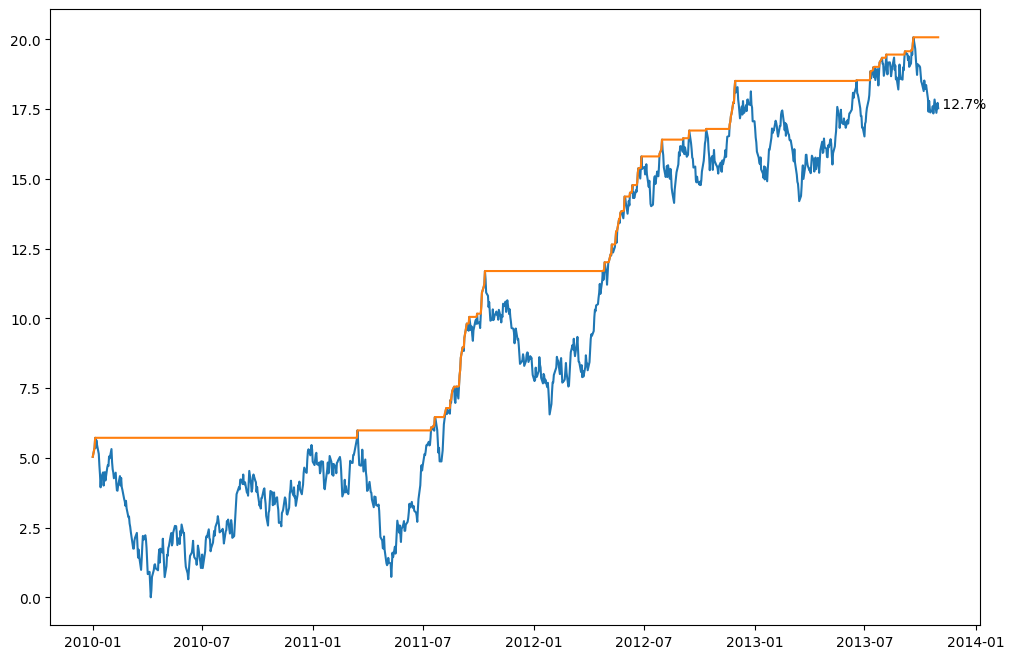

In [42]:
nb.reglue("chart")

for nb in sbook.notebooks:
    print(f"{nb.scraps['symbol'].data: <5} {nb.scraps['distance'].data * 100: .2f}%")
    if nb.scraps['close_to_ath'].data:
        display(nb.scraps['chart'].display['data'], raw=True)   

In [43]:
nb.scraps['prices'].data

,price,ATH
2010-01-01,5.034083,5.034083
2010-01-04,5.359253,5.359253
2010-01-05,5.716434,5.716434
2010-01-06,5.359828,5.716434
2010-01-07,5.629419,5.716434
...,...,...
2013-10-25,17.842275,20.073584
2013-10-28,17.365306,20.073584
2013-10-29,17.548493,20.073584
2013-10-30,17.722405,20.073584


In [46]:
# importing sys
# from module1 import odd_even, add
import sys
 
# adding Folder_2 to the system path
sys.path.insert(0, 'C:\\Users\\roh\\Documents\\python\\Opt_test\\NewTest\\Optimus\\autobot\\src\\general_automation')

from auto_utility_email import EmailsSender

# importing the add and odd_even
# function
 
# calling odd_even function
#odd_even(5)
 
# calling add function
#print("Addition of two number is :", add(2, 2))

29/12/2022 00:00 AM


In [47]:
email_sender = EmailsSender()
result = email_sender.wait_send_complete()

MissingContextError: There is no active flow or task run context.